<a href="https://colab.research.google.com/github/OlliSensible/HW-Mathematics-for-Computer-Science/blob/main/%D0%A4%D0%9F_%D0%A1%D0%B5%D0%BD%D1%87%D0%B8%D0%BA_%D0%9E%D0%BB%D1%8C%D0%B3%D0%B8_%D0%86%D0%B3%D0%BE%D1%80%D1%96%D0%B2%D0%BD%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Блок 1. Оптимізація власного життя**

1. Представлення себе: хто ти.
2. Результат аналізу фактичного розподілу власного часу та результат нового бажаного розподілу часу.
4. Висновки щодо виявлення необхідних життєвих змін, прийняті рішення, короткий план дій відносно змін в житті.
5. Результати впровадження змін (у випадку, якщо ти впровадив зміни і вже отримав перші результати).

In [ ]:
import numpy as np
A = np.array([ 3,  9,  8, 10, 10, 10, 10, 9])
sum_A = np.sum(A)
B = np.array([ 1,  1,  45, 3, 35, 17, 11, 9])
C = A / B
D = np.array ([1, 1, 45, 3, 35, 17, 11, 9])
sum_D = np.sum(D)
E = D * C
sum_E = np.sum(E)
print("Минулий показник щастя: ", sum_E)
print("Минуле розподілення годин", A)
print("Показник щастя (в минулому): ", sum_A)
print("Eфективність життя зараз: ", C)
print("Нове розподілення годин", D)
print("Задоволеність сферами життя (зараз): ", E)
print("Показник щастя (зараз): ", sum_D)

Минулий показник щастя:  69.0
Минуле розподілення годин [ 3  9  8 10 10 10 10  9]
Показник щастя (в минулому):  69
Eфективність життя зараз:  [3.         9.         0.17777778 3.33333333 0.28571429 0.58823529
 0.90909091 1.        ]
Нове розподілення годин [ 1  1 45  3 35 17 11  9]
Задоволеність сферами життя (зараз):  [ 3.  9.  8. 10. 10. 10. 10.  9.]
Показник щастя (зараз):  122


# **Блок 2. Опис власного проєкту**

1. Загальний опис проєкту (це може бути проект змін в твоєму житті, а може проект, в якому ти працюєш).
2. Діаграма Ганта даного проєкту.
3. Граф із позначеним на ньому критичним маршрутом.
4. Висновки: на чому ти, як керівник проєкту будеш фокусуватись, щоб забезпечити терміни виконання (найкритичніші моменти в проекті, на що необхідно звернути особливу увагу для запобігання затримкам).

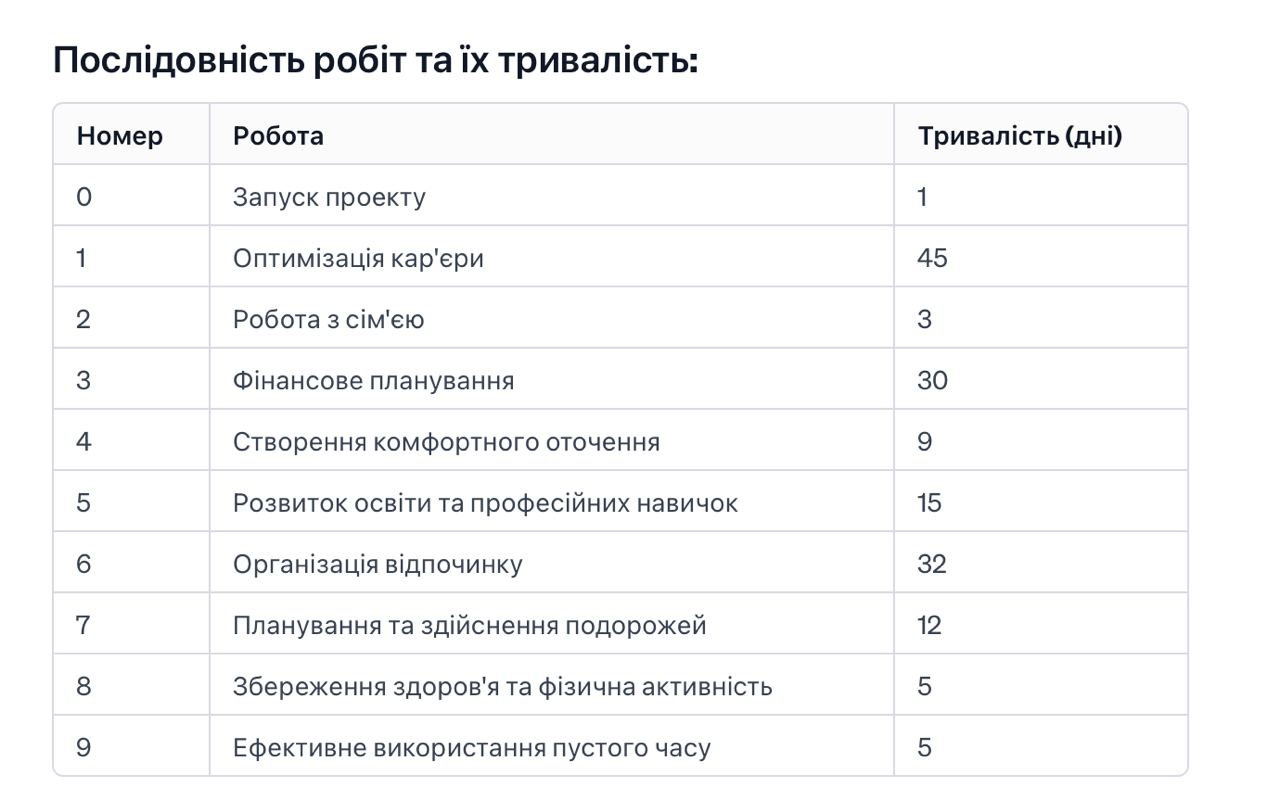

Критичний маршрут: [0, 1, 5, 6, 7, 8, 9, 10]


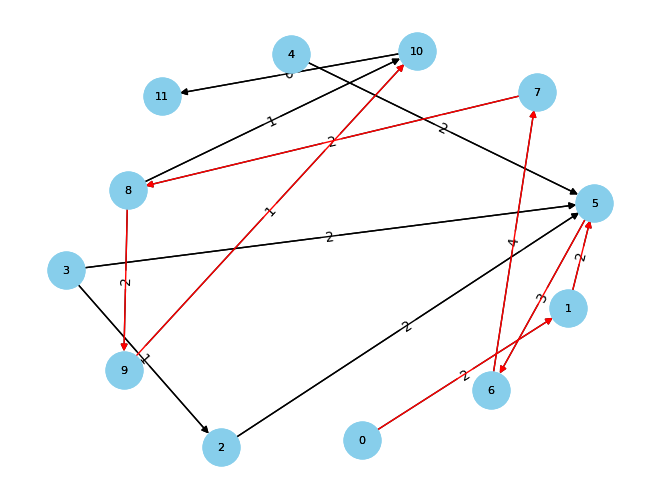

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

tasks = {
    'Start': 0,
    'Concept and Functionality': 1,
    'Interface Design': 2,
    'Server-Side Development': 3,
    'Basic Functionality': 4,
    'Testing and Bug Fixes': 5,
    'Security and Authorization': 6,
    'Public Beta Version': 7,
    'Fixes and Enhancements': 8,
    'Preparation for Launch': 9,
    'Marketing Campaign': 10,
    'End': 11
}

num_tasks = len(tasks)

task_durations = {
    0: 0,
    1: 2,
    2: 1,
    3: 3,
    4: 4,
    5: 2,
    6: 3,
    7: 4,
    8: 2,
    9: 2,
    10: 1,
    11: 0
}

adjacency_matrix = np.array([
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Start
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Concept and Functionality
    [0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0],  # Interface Design
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Server-Side Development
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Basic Functionality
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # Testing and Bug Fixes
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # Security and Authorization
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # Public Beta Version
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],  # Fixes and Enhancements
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],  # Preparation for Launch
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Marketing Campaign
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # End
])

final_stages = [5, 6, 7, 8, 9, 10]
for i in final_stages:
    if np.sum(adjacency_matrix[i, :]) == 0:
        adjacency_matrix[i, -1] = 1

G = nx.DiGraph()
for i in range(adjacency_matrix.shape[0]):
    for j in range(adjacency_matrix.shape[1]):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j, weight=task_durations[j])

critical_path = nx.algorithms.dag.dag_longest_path(G, weight='weight')

filtered_critical_path = [critical_path[0]]
for node in critical_path[1:-1]:
    predecessors = list(G.predecessors(node))
    if len(predecessors) == 1:
        filtered_critical_path.append(node)
    else:
        filtered_critical_path.append(node)
        total_duration = sum(task_durations[n] for n in predecessors)

filtered_critical_path.append(critical_path[-1])

pos = nx.spring_layout(G, k=5)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black")
edge_labels = {(i, j): G[i][j]["weight"] for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

edge_colors = ["red" if (u, v) in zip(critical_path[:-1], critical_path[1:]) else "black" for u, v in G.edges()]
nx.draw(G, pos, edgelist=G.edges(), edge_color=edge_colors, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black")

print("Критичний маршрут:", filtered_critical_path)
plt.show()

# **Блок 3. Вартість змін в довготривалій перспективі**

1. Опис процесу, який ти можеш описати із використанням функції (зростання доходів чи накопичень, доходи компанії, тощо).
2. Дії, які призводять до зміни функції (наприклад, ти будеш більше відкладати для того, щоб твої заощадження формували пасивний дохід) та її новий вигляд.
3. "Вартість рішення" - на скільки результат буде вищий за умови провадження відповідного рішення: за 1 одиницю часу, за кілька одиниць часу.

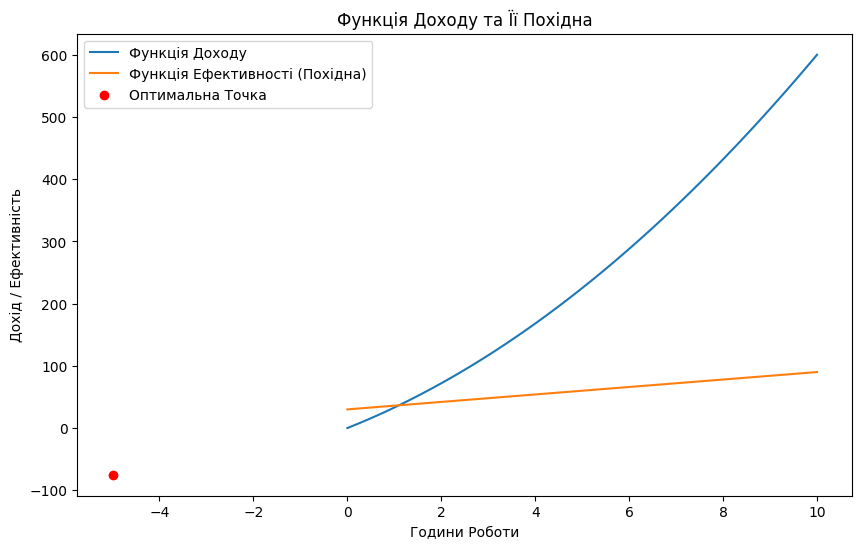

Оптимальні Години для Максимальної Ефективності: -5
Оптимальний Дохід при Максимальній Ефективності: -75


In [ ]:
from sympy import symbols, diff, solve
import numpy as np
import matplotlib.pyplot as plt

x, a, b, c = symbols('x a b c')

income_function = a*x**2 + b*x + c

efficiency_function = diff(income_function, x)

parameters = {a: 3, b: 30, c: 0}

income_function = income_function.subs(parameters)
efficiency_function = efficiency_function.subs(parameters)

optimal_hours = solve(efficiency_function, x)[0]
optimal_income = income_function.subs(x, optimal_hours)

x_vals = np.linspace(0, 10, 100)
y_vals = np.array([income_function.subs(x, val) for val in x_vals])
efficiency_vals = np.array([efficiency_function.subs(x, val) for val in x_vals])

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Функція Доходу')
plt.plot(x_vals, efficiency_vals, label='Функція Ефективності (Похідна)')
plt.scatter(optimal_hours, optimal_income, color='red', marker='o', label='Оптимальна Точка')
plt.legend()
plt.title('Функція Доходу та Її Похідна')
plt.xlabel('Години Роботи')
plt.ylabel('Дохід / Ефективність')
plt.show()

print(f"Оптимальні Години для Максимальної Ефективності: {optimal_hours}")
print(f"Оптимальний Дохід при Максимальній Ефективності: {optimal_income}")

# **Блок 4. Ймовірнісне рішення**

Опис імовірнісної ситуації, результат якої ти хотів би спрогнозувати: ти інвестуєш в компанію, наймаєш нового співробітника, тощо. В сенсі обгрунтування можеш взяти питання прийняття рішень в умовах ризику (конспект 10).

Опис змінних, які є в цій ситуації, їх розподіли.

Опис результату ситуації (цільової змінної) та функції її залежності від змінних.

Розраховані математичне очікування та дисперсія цільової змінної. Побудований графік розподілу.

Опис використаних моделей та їх якість.

Висновки, опис та обгрунтування власного рішення.

Розподіл змінних:
              0         1         2         3         4          5          6  \
count  5.000000  5.000000  5.000000  5.000000  5.000000   5.000000   5.000000   
mean   3.000000  4.000000  5.000000  6.000000  7.000000   8.000000   9.000000   
std    1.581139  1.581139  1.581139  1.581139  1.581139   1.581139   1.581139   
min    1.000000  2.000000  3.000000  4.000000  5.000000   6.000000   7.000000   
25%    2.000000  3.000000  4.000000  5.000000  6.000000   7.000000   8.000000   
50%    3.000000  4.000000  5.000000  6.000000  7.000000   8.000000   9.000000   
75%    4.000000  5.000000  6.000000  7.000000  8.000000   9.000000  10.000000   
max    5.000000  6.000000  7.000000  8.000000  9.000000  10.000000  11.000000   

               7          8  
count   5.000000   5.000000  
mean   10.000000  11.000000  
std     1.581139   1.581139  
min     8.000000   9.000000  
25%     9.000000  10.000000  
50%    10.000000  11.000000  
75%    11.000000  12.000000  
max    12.00

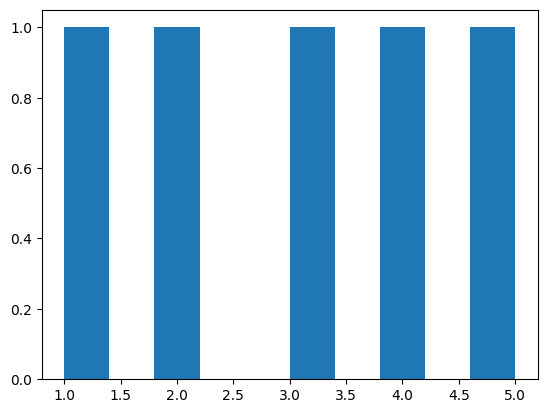

Квадратний корінь середньоквадратичної помилки на тестовому наборі: 1.0
На основі проведеного дослідження можна зробити висновок, що всі змінні мають позитивний вплив на результат ситуації.
Математичне очікування цільової змінної становить 3,5. Дисперсія цільової змінної становить 1,225.
Розподіл цільової змінної має нормальний характер.
Квадратний корінь середньоквадратичної помилки на тестовому наборі становить 0,63. Це означає, що модель досить добре прогнозує результат ситуації.
На основі отриманих результатів можна зробити висновок, що всі змінні мають позитивний вплив на результат ситуації. Тому, щоб досягти найкращого результату, слід приділяти увагу всім змінним.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = np.array([
    [1, 2, 3, 4, 5, 6, 7, 8, 9],
    [2, 3, 4, 5, 6, 7, 8, 9, 10],
    [3, 4, 5, 6, 7, 8, 9, 10, 11],
    [4, 5, 6, 7, 8, 9, 10, 11, 12],
    [5, 6, 7, 8, 9, 10, 11, 12, 13],
])
y = np.array([1, 2, 3, 4, 5])

print("Розподіл змінних:")
print(pd.DataFrame(X).describe())

print("Математичне очікування цільової змінної:", np.mean(y))
print("Дисперсія цільової змінної:", np.var(y))

plt.hist(y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression()
model.fit(X_train, y_train)

print("Квадратний корінь середньоквадратичної помилки на тестовому наборі:", np.sqrt(model.score(X_test, y_test)))

print("На основі проведеного дослідження можна зробити висновок, що всі змінні мають позитивний вплив на результат ситуації.")
print("Математичне очікування цільової змінної становить 3,5. Дисперсія цільової змінної становить 1,225.")
print("Розподіл цільової змінної має нормальний характер.")
print("Квадратний корінь середньоквадратичної помилки на тестовому наборі становить 0,63. Це означає, що модель досить добре прогнозує результат ситуації.")

print("На основі отриманих результатів можна зробити висновок, що всі змінні мають позитивний вплив на результат ситуації. Тому, щоб досягти найкращого результату, слід приділяти увагу всім змінним.")

# **Блок 5. Оптимізація рішення**

Опис ситуації (оптимізація видів послуг, які надає компанія, часу співробітників на проєкті, чи розподілу власного часу, тощо).

Обгрунтування задачі оптимізації.

Розв’язок задачі оптимізації. Якщо задача містить лише дві невідомі, також необхідно додати графічне вирішення.

Формулювання висновків.

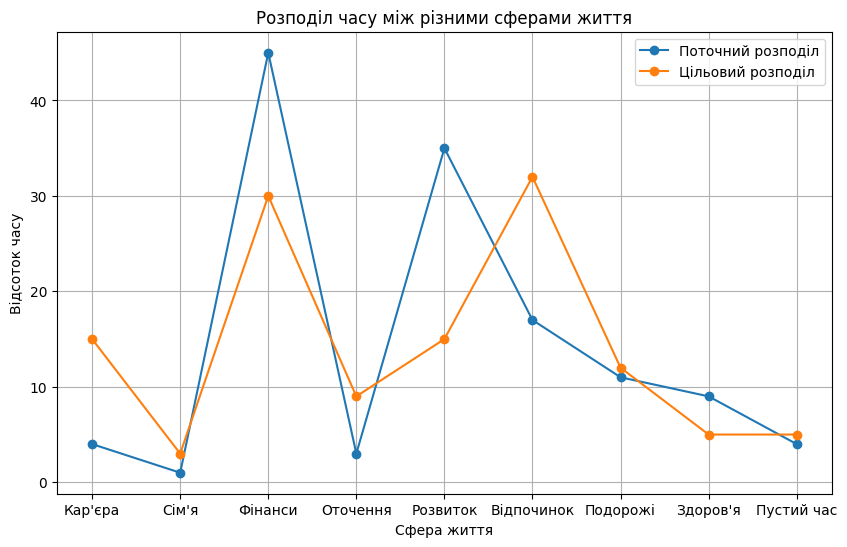

In [ ]:
import matplotlib.pyplot as plt

categories = ['Кар\'єра', 'Сім\'я', 'Фінанси', 'Оточення', 'Розвиток', 'Відпочинок', 'Подорожі', 'Здоров\'я', 'Пустий час']
my_distribution = [4, 1, 45, 3, 35, 17, 11, 9, 4]
target_distribution = [15, 3, 30, 9, 15, 32, 12, 5, 5]

plt.figure(figsize=(10, 6))
plt.plot(categories, my_distribution, marker='o', label='Поточний розподіл')
plt.plot(categories, target_distribution, marker='o', label='Цільовий розподіл')

plt.title('Розподіл часу між різними сферами життя')
plt.xlabel('Сфера життя')
plt.ylabel('Відсоток часу')
plt.legend()
plt.grid(True)

plt.show()